<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import csv dataset**

In [1]:
!wget https://raw.githubusercontent.com/fgith/data-science/main/datasets/heart.csv

--2022-04-15 07:11:01--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0.004s  

2022-04-15 07:11:01 (9.35 MB/s) - ‘heart.csv’ saved [35921/35921]



**Import Libraries**

In [2]:
import pandas as pd

In [3]:
heartdisease = pd.read_csv("heart.csv")
heartdisease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Create X and Y Data Frames**

In [4]:
Y = heartdisease["HeartDisease"] # Assign Y as last column

**Data Pre-Processing replace columns in X that are not numbers with
 numbers**

In [5]:
X = heartdisease.drop("HeartDisease",axis=1) # Assign X and drop the last column
X["Sex"].replace({"M":1,"F":2 }, inplace=True)
X["ChestPainType"].replace({"ATA":1,"NAP":2, "ASY":3, "TA":4}, inplace=True)
X["RestingECG"].replace({"Normal":1,"ST":2, "LVH": 3 }, inplace=True)
X["ExerciseAngina"].replace({"N":1,"Y":2 }, inplace=True)
X["ST_Slope"].replace({"Up":1,"Flat":2, "Down": 3 }, inplace=True)

heartdisease.isnull().sum() # Check if there are null values in the dataset
X


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,1,1.2,2
914,68,1,3,144,193,1,1,141,1,3.4,2
915,57,1,3,130,131,0,1,115,2,1.2,2
916,57,2,1,130,236,0,3,174,1,0.0,2


**Split Data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(734, 11) (184, 11)
(734,) (184,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score

**Fit Logistic Regression model to Training Data**

In [9]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=300)

**Predict test data using the model**

In [10]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0])

In [11]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of Determination: %.2f" % r2_score(Y_test,Y_pred))
print("Score: %.2f" % model.score(X_test,Y_test))

Coefficients:  [[ 0.00446674 -1.2312412   0.59067071 -0.00277903 -0.00279113  0.81110672
   0.03634795 -0.01660446  1.14408617  0.31936101  1.30572944]]
Intercept:  [-0.90010453]
Mean Squared Error: 0.09
Coefficient of Determination: 0.63
Score: 0.91


In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.907608695652174

In [17]:
from sklearn.model_selection import GridSearchCV

params = [
          {'C': [1,10,100,1000], 'max_iter': [100,200,300,400]}
]
GridSearchCV = GridSearchCV(estimator = model, param_grid=params,n_jobs=-1)
GridSearchCV = GridSearchCV.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
accuracy = GridSearchCV.best_score_
accuracy

0.8378343118069145

In [19]:
GridSearchCV.best_params_

{'C': 100, 'max_iter': 400}

In [26]:
model = LogisticRegression(C=100, max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.907608695652174

In [12]:
heartdisease.corr()["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

In [13]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


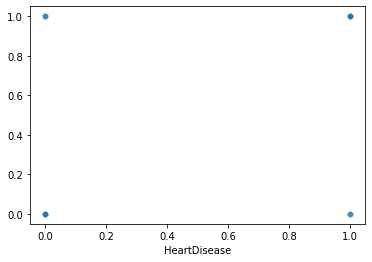

In [14]:
from matplotlib.pyplot import axis
sb.scatterplot(Y_test,Y_pred,alpha=0.2)
